The goal of this notebook is to lightly identify which factors predict future user adoption.

In [1]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns 
import datetime

In [2]:
engage = pd.read_csv(r'C:\Users\agrae\Documents\AAA_Work\Coding\Springboard\HW\002_Machine_learning_case_studies\Relax_inc\1481069814_relax_challenge\relax_challenge\takehome_user_engagement.csv')

In [3]:
file = r'C:\Users\agrae\Documents\AAA_Work\Coding\Springboard\HW\002_Machine_learning_case_studies\Relax_inc\1481069814_relax_challenge\relax_challenge\takehome_users.csv'

In [4]:
user = pd.read_csv(file, encoding='ISO-8859-1')

In [5]:
import chardet
with open(file, 'rb') as rawdata:
    result = chardet.detect(rawdata.read(100000))
result

{'encoding': 'ISO-8859-1', 'confidence': 0.7294372453287324, 'language': ''}

There was a little trouble reading the "user" file so we needed to resolve the UnicodeDecodeError. Let's take a look at our data.

In [6]:
user.head()

,object_id,creation_time,name,email,creation_source,last_session_creation_time,opted_in_to_mailing_list,enabled_for_marketing_drip,org_id,invited_by_user_id
0,1,2014-04-22 03:53:30,Clausen August,AugustCClausen@yahoo.com,GUEST_INVITE,1.398139e+09,1,0,11,10803.0
1,2,2013-11-15 03:45:04,Poole Matthew,MatthewPoole@gustr.com,ORG_INVITE,1.396238e+09,0,0,1,316.0
2,3,2013-03-19 23:14:52,Bottrill Mitchell,MitchellBottrill@gustr.com,ORG_INVITE,1.363735e+09,0,0,94,1525.0
3,4,2013-05-21 08:09:28,Clausen Nicklas,NicklasSClausen@yahoo.com,GUEST_INVITE,1.369210e+09,0,0,1,5151.0
4,5,2013-01-17 10:14:20,Raw Grace,GraceRaw@yahoo.com,GUEST_INVITE,1.358850e+09,0,0,193,5240.0


In [7]:
engage.head()

,time_stamp,user_id,visited
0,2014-04-22 03:53:30,1,1
1,2013-11-15 03:45:04,2,1
2,2013-11-29 03:45:04,2,1
3,2013-12-09 03:45:04,2,1
4,2013-12-25 03:45:04,2,1


In [8]:
engage.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 207917 entries, 0 to 207916
Data columns (total 3 columns):
 #   Column      Non-Null Count   Dtype 
---  ------      --------------   ----- 
 0   time_stamp  207917 non-null  object
 1   user_id     207917 non-null  int64 
 2   visited     207917 non-null  int64 
dtypes: int64(2), object(1)
memory usage: 4.8+ MB


In [9]:
user.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12000 entries, 0 to 11999
Data columns (total 10 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   object_id                   12000 non-null  int64  
 1   creation_time               12000 non-null  object 
 2   name                        12000 non-null  object 
 3   email                       12000 non-null  object 
 4   creation_source             12000 non-null  object 
 5   last_session_creation_time  8823 non-null   float64
 6   opted_in_to_mailing_list    12000 non-null  int64  
 7   enabled_for_marketing_drip  12000 non-null  int64  
 8   org_id                      12000 non-null  int64  
 9   invited_by_user_id          6417 non-null   float64
dtypes: float64(2), int64(4), object(4)
memory usage: 937.6+ KB


Relax Inc describes user adoption as any user who has logged into the product 3 times in a 1 week period at least once. Let's sum up all the times users have done this and give them an 'active' status.

In [10]:
engage['time_stamp'] = pd.to_datetime(engage.time_stamp)

In [11]:
engage.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 207917 entries, 0 to 207916
Data columns (total 3 columns):
 #   Column      Non-Null Count   Dtype         
---  ------      --------------   -----         
 0   time_stamp  207917 non-null  datetime64[ns]
 1   user_id     207917 non-null  int64         
 2   visited     207917 non-null  int64         
dtypes: datetime64[ns](1), int64(2)
memory usage: 4.8 MB


In [12]:
engage.set_index(engage.time_stamp, inplace=True)
engage.drop('time_stamp', axis=1, inplace=True)

In [13]:
engage.head()

,user_id,visited
time_stamp,,
2014-04-22 03:53:30,1,1
2013-11-15 03:45:04,2,1
2013-11-29 03:45:04,2,1
2013-12-09 03:45:04,2,1
2013-12-25 03:45:04,2,1


In [14]:
engage_grp = engage.groupby([pd.Grouper(freq = 'W'), 'user_id']).sum()

In [15]:
engage_grp.head()

visited
time_stamp user_id         
2012-06-03 563            1
           1693           1
           1995           1
           2120           1
           2136           1

In [16]:
active = []
for x in engage_grp.visited:
    if x >= 3: 
       active.append(True) 
    elif x < 3: 
       active.append(False) 
engage_grp['active'] = active

In [17]:
engage = engage_grp.reset_index()

In [18]:
engage.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 68807 entries, 0 to 68806
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   time_stamp  68807 non-null  datetime64[ns]
 1   user_id     68807 non-null  int64         
 2   visited     68807 non-null  int64         
 3   active      68807 non-null  bool          
dtypes: bool(1), datetime64[ns](1), int64(2)
memory usage: 1.6 MB


We have now found the weeks that users have logged into the product at least 3 times. Now we need to just give the users a binary 0 or 1 depending on if they have ever logged in at least 3 times in a week.

In [19]:
engage[engage.user_id == 1693].head()

,time_stamp,user_id,visited,active
1,2012-06-03,1693,1,False
39,2012-06-10,1693,3,True
103,2012-06-17,1693,2,False
195,2012-06-24,1693,3,True
382,2012-07-08,1693,3,True


In [20]:
engaged_week = engage.drop(['time_stamp', 'visited'], axis=1)

In [21]:
engaged_agg = engaged_week.groupby('user_id').agg({'active':'sum'}).reset_index()

In [22]:
engaged_agg[engaged_agg.user_id == 1693]

,user_id,active
1229,1693,60


This user has logged in at least 3 times per week for 60 different weeks! That's a lot, but let's give them a simple 1 if they've ever logged in at least 3 times per week or 0 if they haven't.

In [23]:
active_weekly = []
for x in engaged_agg.active:
    if x >0: 
       active_weekly.append('1') 
    elif x <= 0: 
       active_weekly.append('0') 
engaged_agg['active_weekly'] = active_weekly

In [24]:
engaged_agg = engaged_agg.drop('active', axis=1)

In [25]:
engaged_agg.head()

,user_id,active_weekly
0,1,0
1,2,1
2,3,0
3,4,0
4,5,0


Perfect! We now know who the actively engaged users of Relax are. Let's merge our engaged data with our userdata so we can start to identify which factors correlate to weekly user engagement.

In [26]:
user = user.rename({'object_id':'user_id'},axis=1)

In [27]:
user.columns

Index(['user_id', 'creation_time', 'name', 'email', 'creation_source',
       'last_session_creation_time', 'opted_in_to_mailing_list',
       'enabled_for_marketing_drip', 'org_id', 'invited_by_user_id'],
      dtype='object')

In [32]:
user = user.merge(engaged_agg, how='left', on='user_id')

In [33]:
user.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 12000 entries, 0 to 11999
Data columns (total 11 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   user_id                     12000 non-null  int64  
 1   creation_time               12000 non-null  object 
 2   name                        12000 non-null  object 
 3   email                       12000 non-null  object 
 4   creation_source             12000 non-null  object 
 5   last_session_creation_time  8823 non-null   float64
 6   opted_in_to_mailing_list    12000 non-null  int64  
 7   enabled_for_marketing_drip  12000 non-null  int64  
 8   org_id                      12000 non-null  int64  
 9   invited_by_user_id          6417 non-null   float64
 10  active_weekly               8823 non-null   object 
dtypes: float64(2), int64(4), object(5)
memory usage: 1.1+ MB


There seem to be many null values for 'active_weekly'. Apparently many of the users created an account but have not used the product yet. Let's fill in the nulls with a 0.

In [34]:
user['active_weekly'] = user.active_weekly.fillna(0)

In [35]:
user.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 12000 entries, 0 to 11999
Data columns (total 11 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   user_id                     12000 non-null  int64  
 1   creation_time               12000 non-null  object 
 2   name                        12000 non-null  object 
 3   email                       12000 non-null  object 
 4   creation_source             12000 non-null  object 
 5   last_session_creation_time  8823 non-null   float64
 6   opted_in_to_mailing_list    12000 non-null  int64  
 7   enabled_for_marketing_drip  12000 non-null  int64  
 8   org_id                      12000 non-null  int64  
 9   invited_by_user_id          6417 non-null   float64
 10  active_weekly               12000 non-null  object 
dtypes: float64(2), int64(4), object(5)
memory usage: 1.1+ MB


In [36]:
user.head()

,user_id,creation_time,name,email,creation_source,last_session_creation_time,opted_in_to_mailing_list,enabled_for_marketing_drip,org_id,invited_by_user_id,active_weekly
0,1,2014-04-22 03:53:30,Clausen August,AugustCClausen@yahoo.com,GUEST_INVITE,1.398139e+09,1,0,11,10803.0,0
1,2,2013-11-15 03:45:04,Poole Matthew,MatthewPoole@gustr.com,ORG_INVITE,1.396238e+09,0,0,1,316.0,1
2,3,2013-03-19 23:14:52,Bottrill Mitchell,MitchellBottrill@gustr.com,ORG_INVITE,1.363735e+09,0,0,94,1525.0,0
3,4,2013-05-21 08:09:28,Clausen Nicklas,NicklasSClausen@yahoo.com,GUEST_INVITE,1.369210e+09,0,0,1,5151.0,0
4,5,2013-01-17 10:14:20,Raw Grace,GraceRaw@yahoo.com,GUEST_INVITE,1.358850e+09,0,0,193,5240.0,0


Now we can modify some features and see correlation between them and being an active weekly user.

In [37]:
user.creation_source.unique()

array(['GUEST_INVITE', 'ORG_INVITE', 'SIGNUP', 'PERSONAL_PROJECTS',
       'SIGNUP_GOOGLE_AUTH'], dtype=object)

In [38]:
user.creation_source.replace({'GUEST_INVITE':0, 'ORG_INVITE':1, 'SIGNUP':2, 'PERSONAL_PROJECTS':3,'SIGNUP_GOOGLE_AUTH':4}, regex=True, inplace=True)

In [44]:
user['active_weekly'] = user.active_weekly.astype(int)

In [45]:
user.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 12000 entries, 0 to 11999
Data columns (total 11 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   user_id                     12000 non-null  int64  
 1   creation_time               12000 non-null  object 
 2   name                        12000 non-null  object 
 3   email                       12000 non-null  object 
 4   creation_source             12000 non-null  int64  
 5   last_session_creation_time  8823 non-null   float64
 6   opted_in_to_mailing_list    12000 non-null  int64  
 7   enabled_for_marketing_drip  12000 non-null  int64  
 8   org_id                      12000 non-null  int64  
 9   invited_by_user_id          6417 non-null   float64
 10  active_weekly               12000 non-null  int32  
dtypes: float64(2), int32(1), int64(5), object(3)
memory usage: 1.1+ MB


<AxesSubplot:>

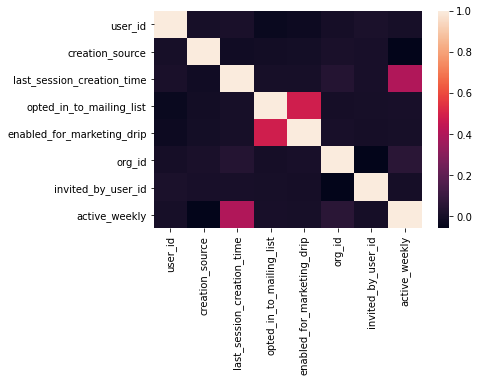

In [46]:
sns.heatmap(user.corr())

There does not seem to be a large correlation between many of the features and whether the user is an active user or not.